In [202]:
import pandas as pd
import numpy as np
import graphviz

from sklearn import tree
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 

In [203]:
iris = load_iris() 
df = pd.DataFrame(iris['data'], columns=iris['feature_names']) 
y = iris['target'] == 1 

In [204]:
m = DecisionTreeClassifier(max_depth=3) 
model=m.fit(df, y)

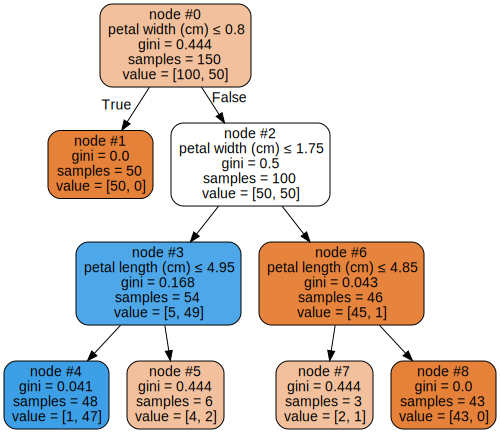

In [205]:
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=iris['feature_names'],  
                      filled=True, rounded=True,  
                      special_characters=True, node_ids=True)  
graph = graphviz.Source(dot_data)  
graph 

In [206]:
def tree_to_sql(tree,feature_names,sample,accuracy):
    
    tree_ = tree.tree_
    
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    condition=[None]*model.tree_.node_count 
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            
            left_message="{} <= {}".format(name, threshold)
            if condition[node]==None:
                condition[model.tree_.children_left[node]]=left_message
            else:
                condition[model.tree_.children_left[node]]=condition[node]+" AND "+left_message
            recurse(tree_.children_left[node], depth + 1)
           
            right_message="{} > {}".format(name, threshold)
            if condition[node]==None:
                condition[model.tree_.children_right[node]]=right_message
            else:
                condition[model.tree_.children_right[node]]=condition[node]+" AND "+right_message
            recurse(tree_.children_right[node], depth + 1)      
    
    recurse(0, 1)   
    
    count_desired_nodes=0
    
    print("Rules for nodes with sample size>={} and accuracy>={}%:\n".format(sample, accuracy*100))
    
    for node in range(0, model.tree_.node_count):
        sum_node=np.sum(np.sum(model.tree_.value,axis=1),axis=1)[node]
        accuracy_node=model.tree_.value[node,0][1]/sum_node
        if  sum_node>=sample and accuracy_node>=accuracy:
            print("Node {}: {}".format(node,condition[node]))
            count_desired_nodes+=1
    
    if count_desired_nodes==0:
        print("No such node found")
    
    print("\n\n\nRules for all nodes:")
    return condition           

In [208]:
tree_to_sql(model,iris['feature_names'],48,0.9)

Rules for nodes with sample size>=48 and accuracy>=90.0%:

Node 3: petal width (cm) > 0.800000011920929 AND petal width (cm) <= 1.75
Node 4: petal width (cm) > 0.800000011920929 AND petal width (cm) <= 1.75 AND petal length (cm) <= 4.950000047683716



Rules for all nodes:


[None,
 'petal width (cm) <= 0.800000011920929',
 'petal width (cm) > 0.800000011920929',
 'petal width (cm) > 0.800000011920929 AND petal width (cm) <= 1.75',
 'petal width (cm) > 0.800000011920929 AND petal width (cm) <= 1.75 AND petal length (cm) <= 4.950000047683716',
 'petal width (cm) > 0.800000011920929 AND petal width (cm) <= 1.75 AND petal length (cm) > 4.950000047683716',
 'petal width (cm) > 0.800000011920929 AND petal width (cm) > 1.75',
 'petal width (cm) > 0.800000011920929 AND petal width (cm) > 1.75 AND petal length (cm) <= 4.8500001430511475',
 'petal width (cm) > 0.800000011920929 AND petal width (cm) > 1.75 AND petal length (cm) > 4.8500001430511475']